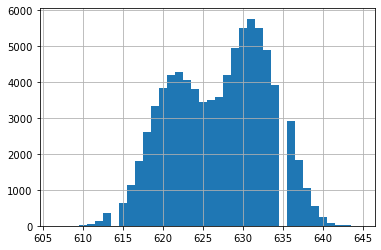

In [2]:
#測定値をグラフで表示。グラフは、マルチモーダル（多峰性）な分布
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./sensor_data_600.txt", delimiter=" ", header = None, names = ("date", "time", "ir", "lidar"))

data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align="left")
plt.show()

In [3]:
data

,date,time,ir,lidar
0,20180202,110001,28,627
1,20180202,110004,17,626
2,20180202,110007,14,627
3,20180202,110010,31,622
4,20180202,110013,24,630
...,...,...,...,...
82296,20180205,84216,39,634
82297,20180205,84220,13,637
82298,20180205,84222,37,633
82299,20180205,84225,36,633


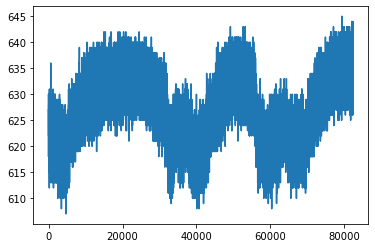

In [4]:
#Lidar値を、測定した順番に並べて表示
data.lidar.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>


Text(0, 0.5, 'Lidar value (mm)')

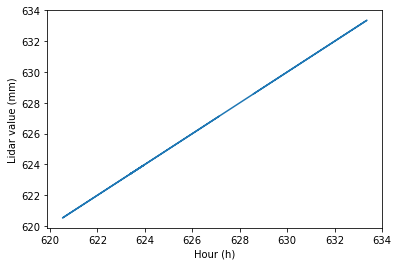

In [75]:
data["hour"] = [e//10000 for e in data.time] #timeのうち、分秒を切り捨て。
d = data.groupby("hour")                     #各時刻のデータをグルーピング。dには全てのデータが入っている。

#PandasのseriesからDataFrameへ変換
new_d = pd.DataFrame(d.lidar.mean())         #lidar値を平均し、indexのhourが横軸でプロット。
print(type(new_d))

#Matplotlibで、オブジェクト指向インターフェースの記述方法
fig, ax = plt.subplots()
ax.plot(new_d["lidar"].index, new_d["lidar"],  label = 'lidar')
ax.set_xlabel('Hour (h)')
ax.set_ylabel('Lidar value (mm)')

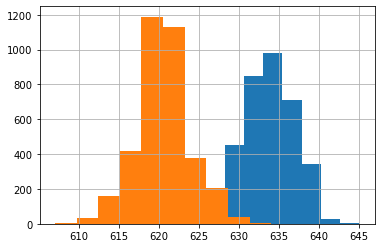

In [6]:
#6時と14時に測定したlidarのデータの分布を目視で比較。
d.lidar.get_group(6).hist()
d.lidar.get_group(14).hist()
plt.show()